# Blood Donation Prediction

In this project, data on the donation characteristics of blood donors are analyzed, then used to predict the likelihood of donation at the present month (March 2007). The donor data are from the Blood Transfusion Service Center in Hsin-Chu City, Taiwan.

Data source: Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence," Expert Systems with Applications, 2008. Accessed from UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center).

## I. Exploratory Data Analysis

First, exploratory data analysis is performed.

In [1]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn') # set plotting style
import seaborn as sns

#### A. Examining the Dataset

In [2]:
# Load data
dataset = pd.read_csv('transfusion.data')
dataset.columns = ['Recency', 'Frequency', 'Volume', 'Time', 'Target']

In [3]:
# Inspect dataset
dataset.head()

,Recency,Frequency,Volume,Time,Target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
# Inspect dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
Recency      748 non-null int64
Frequency    748 non-null int64
Volume       748 non-null int64
Time         748 non-null int64
Target       748 non-null int64
dtypes: int64(5)
memory usage: 29.3 KB


The dataset contains information on 748 blood donors. Five variables are reported. For machine learning purposes, four of these variables are *features* or variables that will inform the prediction, and one variable is the *target* or variable to be predicted. All fields contain integer values, and there are no null values in the dataset.

The variables are as follows:
* **Recency**: Months since last donation
* **Frequency**: Total number of donations
* **Volume**: Total volume (c.c.) of blood donated
* **Time**: Months since first donation
* **Target**: Whether or not the donor made a donation in the present month (March 2007(. Reported as a 0 or 1, where 1 indicates a donation made.

Some of the terminology derives from the RFM marketing model, as the authors developed this dataset for demonstration of said model.

#### B. Exploring the Data

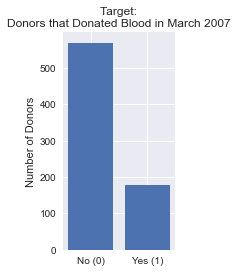

23.8 % of donors did make a donation in the Present Month.


In [5]:
# Plot bar graph of target
plt.figure(figsize=[2,4])
plt.bar(['No (0)', 'Yes (1)'],[sum(dataset.Target==0), sum(dataset.Target==1)])
plt.ylabel('Number of Donors')
plt.title('Target:\nDonors that Donated Blood in March 2007')
plt.show()

# Report % donations
pct_yes = round(sum(dataset.Target)/len(dataset) * 100, 1)
print(f'{pct_yes} % of donors did make a donation in the Present Month.')

Donors fit into one one of two binary groups: those who *did not* (0) or *did* (1) make a donation in the present month. Around one-fourth of donors fit into the latter group.

In [6]:
dataset.describe().iloc[[1,2,3,5,7]].rename(index={'50%':'median'}).apply(lambda x: round(x,1)).iloc[:, :4]

,Recency,Frequency,Volume,Time
mean,9.5,5.5,1378.7,34.3
std,8.1,5.8,1459.8,24.4
min,0.0,1.0,250.0,2.0
median,7.0,4.0,1000.0,28.0
max,74.0,50.0,12500.0,98.0


Descriptive statistics are provided above. The average recency is 9.5 months since last donation, frequency is 5.5 total donations, volume is 1378.7 c.c. total blood donated, and time is 34.3 months since the first donation.

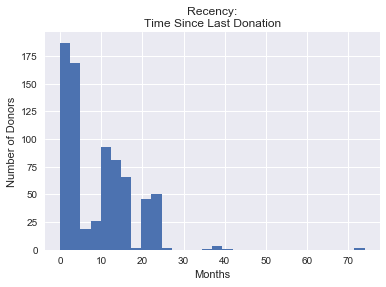

In [7]:
# Plot histogram of recency
plt.hist(dataset.Recency, bins=30)
plt.xlabel('Months')
plt.ylabel('Number of Donors')
plt.title('Recency:\nTime Since Last Donation')
plt.show()

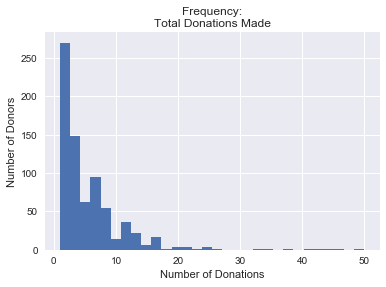

In [8]:
# Plot histogram of frequency
plt.hist(dataset.Frequency, bins=30)
plt.xlabel('Number of Donations')
plt.ylabel('Number of Donors')
plt.title('Frequency:\nTotal Donations Made')
plt.show()

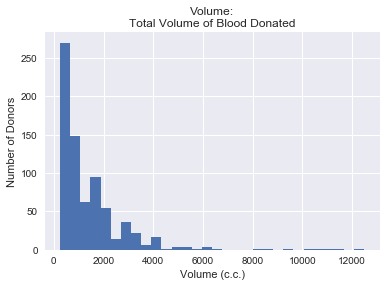

In [9]:
# Plot histogram of volume
plt.hist(dataset.Volume, bins=30)
plt.xlabel('Volume (c.c.)')
plt.ylabel('Number of Donors')
plt.title('Volume:\nTotal Volume of Blood Donated')
plt.show()

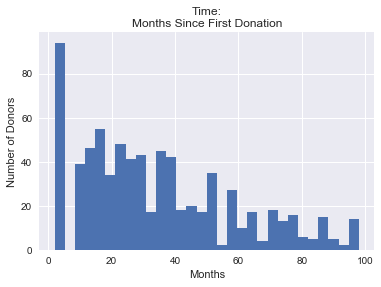

In [10]:
# Plot histogram of time
plt.hist(dataset.Time, bins=30)
plt.xlabel('Months')
plt.ylabel('Number of Donors')
plt.title('Time:\nMonths Since First Donation')
plt.show()

The four histograms above show the distribution of recency, frequency, volume and time.
The dataset is (a) weighted toward recent donations, though with spikes around one year and two years prior, (b) weighted steeply toward smaller numbers and volumes of total donations, and (c) sweighted toward a shorter total time as a donor at the center.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


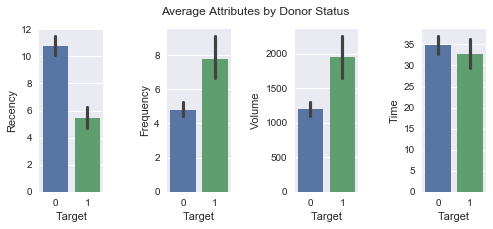

In [11]:
# Plot bar graphs for average attributes by status
fig, axes = plt.subplots(1,4, figsize=[8,3])
plt.subplots_adjust(wspace=1)
fig.suptitle('Average Attributes by Donor Status')
sns.barplot(y='Recency', x='Target', data=dataset, ax=axes[0])
sns.barplot(y='Frequency', x='Target', data=dataset, ax=axes[1])
sns.barplot(y='Volume', x='Target', data=dataset, ax=axes[2])
sns.barplot(y='Time', x='Target', data=dataset, ax=axes[3])
plt.show()

Bar graphs for average attritubes by donor status in the present month (target value of 0/1) are shown. On average, people who donated in the present month have donated more recently (shorter bar indicating less time has passed), a higher number of times, and a larger total volume, than those who did not donate in the present month. There appears to be no significant difference between the two groups for total time as a donor at the center.

#### C. Feature Comparison

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


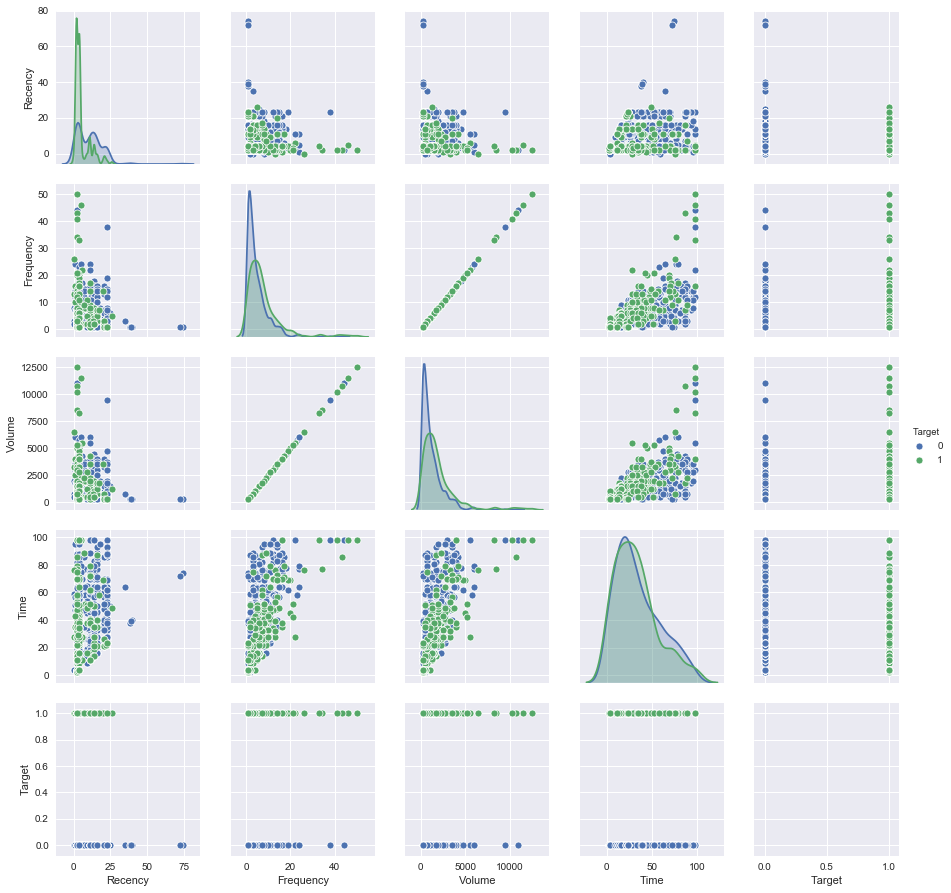

In [12]:
# Pairplot
sns.pairplot(data=dataset, hue='Target')
plt.show()

A pairplot of the data is shown above. Blue and green correspond to target values of 0 and 1. This plot echoes many of the patterns observed in examination of individual featuares, including differences in the distribution of recency, frequency, and volume, but not time, depending on donor status. Volume and frequency appear to have near perfect linear correlation, so inclusion of both features in a model may be redundant.

## II. Machine Learning

Supervised learning is performed using the Recency, Frequency, and Time features to predict whether or not a donation will be made in the present month.

Three supervised learning models are tested: support vector machine, logistic regression, and K nearest neighbors. All models are optimized using a grid search for hyperparameter tuning. Models are assessed by simple accuracy, confusion matrix, ROC AUC, and shape of the ROC curve.

In [13]:
# Load packages
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# Convert dataset to numpy arrays of features and target, normalize features, split into training and test sets
X = dataset.iloc[:, [0, 1, 3]].values # Exclude volume
y = dataset.iloc[:, 4].values
X = normalize(X, axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

#### A.  Support Vector Machine

In [15]:
# Use GridSearchCV for hyperparameter optimization of SVC
params = {'kernel': ('linear', 'poly', 'rbf', 'sigmoid'), 'C':[0.001, 0.01, 1, 10, 100, 1000, 10000],
  'class_weight':(None, 'balanced')}
svc_search = GridSearchCV(SVC(gamma='scale', probability=True), params, cv=5, iid=False)
svc_search.fit(X, y)
print(f'Best estimator: \n{svc_search.best_estimator_}')
print(f'\nBest score: {svc_search.best_score_}')

Best estimator: 
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Best score: 0.7780939597315436


In [16]:
# Fit an SVC model with the optimal hyperparameters
svc = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr',
    degree=3, gamma='scale', kernel='rbf', max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)
y_proba = svc.predict_proba(X_test)

In [17]:
# Report accuracy and confusion matrix
confmat = pd.DataFrame(data=confusion_matrix(y_test, y_predict), index=['True 0', 'True 1'],
   columns=['Predicted 0', 'Predicted 1'])
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy score: {accuracy}\n\nConfusion Matrix:\n\n{confmat}')

Accuracy score: 0.7822222222222223

Confusion Matrix:

        Predicted 0  Predicted 1
True 0          172            0
True 1           49            4


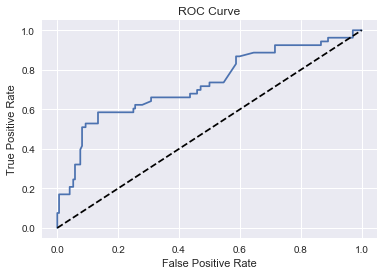

Receiver Operating Characteristic Area Under Curve (ROC AUC) Score: 0.7271281263712155


In [18]:
# Report ROC-AUC score and ROC curve
rascore = roc_auc_score(y_test, y_proba[:,1])
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])
plt.figure()
plt.plot(fpr, tpr)
plt.plot(np.arange(0,1.1), np.arange(0,1.1), linestyle='dashed', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print(f'Receiver Operating Characteristic Area Under Curve (ROC AUC) Score: {rascore}')

#### B. Logistic Regression

In [19]:
# Use GridSearchCV for hyperparameter optimization of logistic regression
params_1 = {'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
    'C':[0.001, 0.01, 1, 10, 100, 1000, 10000]}
logreg_search = GridSearchCV(LogisticRegression(max_iter=1000), params_1, cv=5, iid=False)
logreg_search.fit(X, y)
print(f'Best estimator: \n{logreg_search.best_estimator_}')
print(f'\nBest score: {logreg_search.best_score_}')

Best estimator: 
LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

Best score: 0.7807874720357942


In [20]:
# Fit a logistic regression model with the optimal hyperparameters
logreg = LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1,
    max_iter=1000, multi_class='warn', n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
    tol=0.0001, verbose=0, warm_start=False)
logreg.fit(X_train, y_train)
y_predict_1 = logreg.predict(X_test)
y_proba_1 = logreg.predict_proba(X_test)

In [21]:
# Report accuracy and confusion matrix
confmat_1 = pd.DataFrame(data=confusion_matrix(y_test, y_predict_1), index=['True 0', 'True 1'],
   columns=['Predicted 0', 'Predicted 1'])
accuracy_1 = accuracy_score(y_test, y_predict_1)
print(f'Accuracy score: {accuracy_1}\n\nConfusion Matrix:\n\n{confmat_1}')

Accuracy score: 0.7777777777777778

Confusion Matrix:

        Predicted 0  Predicted 1
True 0          166            6
True 1           44            9


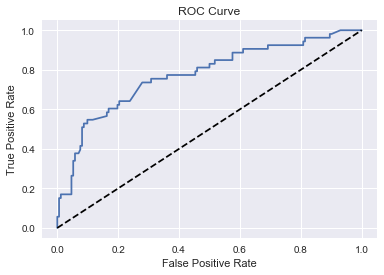

Receiver Operating Characteristic Area Under Curve (ROC AUC) Score: 0.7737494515138218


In [22]:
# Report ROC-AUC score and ROC curve
rascore_1 = roc_auc_score(y_test, y_proba_1[:,1])
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_proba_1[:,1])
plt.figure()
plt.plot(fpr_1, tpr_1)
plt.plot(np.arange(0,1.1), np.arange(0,1.1), linestyle='dashed', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print(f'Receiver Operating Characteristic Area Under Curve (ROC AUC) Score: {rascore_1}')

#### C. K Nearest Neighbors

In [23]:
# Use GridSearchCV for hyperparameter optimization of K nearest neighbors
params_2 = {'n_neighbors': np.arange(1, 10), 'weights': ('uniform', 'distance'), 'p': [1,2],
    'algorithm': ('ball_tree', 'kd_tree', 'brute'), 'metric': ('minkowski', 'euclidean', 'manhattan', 'chebyshev')}
knn_search = GridSearchCV(KNeighborsClassifier(), params_2, cv=5, iid=False)
knn_search.fit(X, y)
print(f'Best estimator: \n{knn_search.best_estimator_}')
print(f'\nBest score: {knn_search.best_score_}')

Best estimator: 
KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='chebyshev',
           metric_params=None, n_jobs=None, n_neighbors=8, p=1,
           weights='uniform')

Best score: 0.7260044742729306


In [24]:
# Fit a nearest neighbors model with the optimal hyperparameters
knn = KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='chebyshev', metric_params=None,
    n_jobs=None, n_neighbors=8, p=1, weights='uniform')
knn.fit(X_train, y_train)
y_predict_2 = knn.predict(X_test)
y_proba_2 = knn.predict_proba(X_test)

In [25]:
# Report accuracy and confusion matrix
confmat_2 = pd.DataFrame(data=confusion_matrix(y_test, y_predict_2), index=['True 0', 'True 1'],
   columns=['Predicted 0', 'Predicted 1'])
accuracy_2 = accuracy_score(y_test, y_predict_2)
print(f'Accuracy score: {accuracy_2}\n\nConfusion Matrix:\n\n{confmat_2}')

Accuracy score: 0.7911111111111111

Confusion Matrix:

        Predicted 0  Predicted 1
True 0          160           12
True 1           35           18


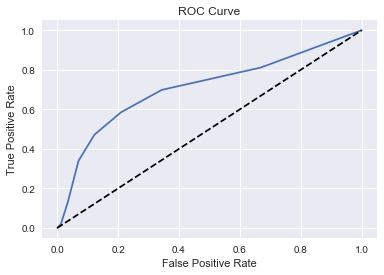

Receiver Operating Characteristic Area Under Curve (ROC AUC) Score: 0.7090280824923213


In [26]:
# Report ROC-AUC score and ROC curve
rascore_2 = roc_auc_score(y_test, y_proba_2[:,1])
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_proba_2[:,1])
plt.figure()
plt.plot(fpr_2, tpr_2)
plt.plot(np.arange(0,1.1), np.arange(0,1.1), linestyle='dashed', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print(f'Receiver Operating Characteristic Area Under Curve (ROC AUC) Score: {rascore_2}')

In [27]:
ml_compare = pd.DataFrame(data={'Accuracy': [accuracy, accuracy_1, accuracy_2],
    'ROC_AUC': [rascore, rascore_1, rascore_2]})
ml_compare.index=('SVC', 'LogReg', 'KNN')
print(ml_compare)

acc_zero = 1-sum(y_test)/len(y_test)
print(f'\n\nIf all target values were assumed to be 0,\nbaseline accuracy would be: {acc_zero}')

        Accuracy   ROC_AUC
SVC     0.782222  0.727128
LogReg  0.777778  0.773749
KNN     0.791111  0.709028


If all target values were assumed to be 0,
baseline accuracy would be: 0.7644444444444445


The three models are compared in the dataframe printed above. Accuracy levels are only marginally above the baseline. The K Nearest Neighbors classifier has the highest accuracy by a small margin. ROC curves and ROC AUC scores indicate decent but not great separability between the classes. The Logistic Regression classifier has the highest ROC AUC score.

Three different supervised learning models were tested, all with thorough hyperparameter tuning. Thus, the accuracy and ROC AUC scores presented here represent an approximate upper limit for classification, without further feature engineering.

## III. Deep Learning

Deep learning is used to model the data, using the same input data and metrics for success as the early tested supervised learning approaches.

In [28]:
# Load packages
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [29]:
# Create and fit model
dlmodel = Sequential()
dlmodel.add(Dense(3, input_dim=3, activation='elu'))
dlmodel.add(Dense(3, activation='tanh'))
dlmodel.add(Dense(3, activation='elu'))
dlmodel.add(Dense(1, activation='sigmoid')) # sigmoid used for binary classification

dlmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

dlmodel.fit(X_train, y_train, epochs=10, batch_size=10)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
523/523 [==============================] - 0s 734us/step - loss: 0.6600 - acc: 0.7591
Epoch 2/10
523/523 [==============================] - 0s 123us/step - loss: 0.6044 - acc: 0.7610
Epoch 3/10
523/523 [==============================] - 0s 114us/step - loss: 0.5685 - acc: 0.7610
Epoch 4/10
523/523 [==============================] - 0s 109us/step - loss: 0.5546 - acc: 0.7610
Epoch 5/10
523/523 [==============================] - 0s 118us/step - loss: 0.5513 - acc: 0.7610
Epoch 6/10
523/523 [==============================] - 0s 111us/step - loss: 0.5503 - acc: 0.7610
Epoch 7/10
523/523 [==============================] - 0s 105us/step - loss: 0.5501 - acc: 0.7610
Epoch 8/10
523/523 [==============================] - 0s 97us/step - loss: 0.5494 - acc: 0.7610
Epoch 9/10
523/523 [==============================] - 0s 115us/step - loss: 0.5497 - acc: 0.7610
Epoch 10

In [30]:
# Get predictions and probabilities
y_proba_3 = dlmodel.predict(X_test)
y_predict_3 = (y_proba_3 > 0.5)

In [31]:
# Report accuracy and confusion matrix
confmat_3 = pd.DataFrame(data=confusion_matrix(y_test, y_predict_3), index=['True 0', 'True 1'],
   columns=['Predicted 0', 'Predicted 1'])
accuracy_3 = accuracy_score(y_test, y_predict_3)
print(f'Accuracy score: {accuracy_3}\n\nConfusion Matrix:\n\n{confmat_3}')

Accuracy score: 0.7644444444444445

Confusion Matrix:

        Predicted 0  Predicted 1
True 0          172            0
True 1           53            0


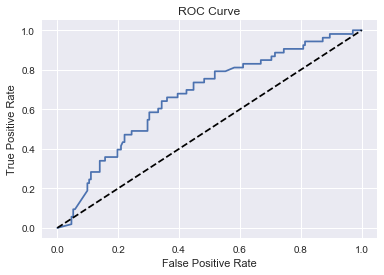

Receiver Operating Characteristic Area Under Curve (ROC AUC) Score: 0.6662461605967529


In [32]:
# Report ROC-AUC score and ROC curve
rascore_3 = roc_auc_score(y_test, y_proba_3)
fpr_3, tpr_3, thresholds_3 = roc_curve(y_test, y_proba_3)
plt.figure()
plt.plot(fpr_3, tpr_3)
plt.plot(np.arange(0,1.1), np.arange(0,1.1), linestyle='dashed', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print(f'Receiver Operating Characteristic Area Under Curve (ROC AUC) Score: {rascore_3}')

After several iterations of options for layers (not shown), deep learning models tend to converge on the prediction that all target values are 0, with an ROC AUC score in the same range as those for early supervised learning models.